In [1]:
import pandas as pd
import numpy as np
import os

## Loading Data  (Pending)

In [2]:
games_data = pd.read_csv('games.csv',low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: 'games.csv'

In [31]:
players_data = pd.read_csv('players.csv',low_memory = False)

In [32]:
plays_data = pd.read_csv('plays.csv', low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: 'plays.csv'

## Data Pre-Processing

#### Games File
1. gameId: Game identifier, unique (numeric)
2. gameDate: Game Date (time, mm/dd/yyyy)
3. gameTimeEastern: Start time of game (time, HH:MM:SS, EST)
4. homeTeamAbbr: Home team three-letter code (text)
5. visitorTeamAbbr: Visiting team three-letter code (text)
6. week: Week of game (numeric)

In [33]:
import datetime

dates = games_data['gameDate']
## Changing the format of date to standard format in all files
stand_date = pd.to_datetime(dates)
games_data['gameDate'] = stand_date

## Adding column named 'days'
days = games_data['gameDate'].apply(lambda x: x.strftime('%a'))
games_data['days'] = days

NameError: name 'games_data' is not defined

#### Players File
1. nflId: Player identification number, unique across players (numeric)
2. height: Player height (text)
3. weight: Player weight (numeric)
4. birthDate: Date of birth (YYYY-MM-DD)
5. collegeName: Player college (text)
6. position: Player position (text)
7. displayName: Player name (text)


In [34]:
## Changing the format of date to standard format in all files
stand_date = pd.to_datetime(players_data['birthDate'])
players_data['birthDate'] = stand_date

## Converting height into inches
players_data['height'] = [int(i[0])*12 + int(i[2]) if '-' in i else i for i in players_data['height'] ]
players_data['height'] = pd.to_numeric(players_data['height'])

## Adding two column name 'year' and 'age'
players_data['year'] = pd.to_datetime(players_data['birthDate']).dt.year
players_data['age'] = 2018 - players_data['year']

#### Plays File
1. gameId: Game identifier, unique (numeric)
2. playId: Play identifier, not unique across games (numeric)
4. playDescription: Description of play (text)
5. quarter: 1. Game quarter (numeric)
6. down: 2. Down (numeric)
7. yardsToGo: 3. Distance needed for a first down (numeric)
8. possessionTeam: 4. Team on offense (text)
9. playType: 5. Outcome of dropback: sack or pass (text)
10. yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)
11. yardlineNumber: 6. Yard line at line-of-scrimmage (numeric)
12. offenseFormation: 7. Formation used by possession team (text)
13. personnelO: 8. Personnel used by offensive team (text)
14. defendersInTheBox: 9. Number of defenders in close proximity to line-of-scrimmage (numeric)
15. numberOfPassRushers: 10. Number of pass rushers (numeric)
16. personnelD: 11. Personnel used by defensive team (text)
17. typeDropback: 12. Dropback categorization of quarterback (text)
18. preSnapHomeScore: 13. Home score prior to the play (numeric)
19. preSnapVisitorScore: 14. Visiting team score prior to the play (numeric)
20. gameClock: Time on clock of play (MM:SS)
21. absoluteYardlineNumber: 15. Distance from end zone for possession team (numeric)
22. penaltyCodes: NFL categorization of the penalties that ocurred on the play. For purposes of this contest, the most important penalties are Defensive Pass Interference (DPI), Offensive Pass Interference (OPI), Illegal Contact (ICT), and Defensive Holding (DH). Multiple penalties on a play are separated by a ; (text)
23. penaltyJerseyNumber: Jersey number and team code of the player commiting each penalty. Multiple penalties on a play are separated by a ; (text) 
24. passResult: 16. Outcome of the passing play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)
25. offensePlayResult: Yards gained by the offense, excluding penalty yardage (numeric)
26. playResult: Net yards gained by the offense, including penalty yardage (numeric)
27. epa: Expected points added on the play, relative to the offensive team. Expected points is a metric that estimates the average of every next scoring outcome given the play's down, distance, yardline, and time remaining (numeric)
28. isDefensivePI: An indicator variable for whether or not a DPI penalty ocurred on a given play (TRUE/FALSE)



In [35]:
plays_df = plays_data.drop(columns=['gameId', 'playId', 'playDescription', 'yardlineSide', 'preSnapHomeScore', 'preSnapVisitorScore', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers', 'epa', 'isDefensivePI','personnelO','personnelD','offensePlayResult'])

plays_df  ##Updated plays_df

NameError: name 'plays_data' is not defined

In [36]:
##Checking Null Values
plays_df.isnull().sum()

NameError: name 'plays_df' is not defined

In [37]:
#pip install pandas_profiling

In [38]:
#from pandas_profiling import ProfileReport

In [39]:
#profile = ProfileReport(plays_df, title="Pandas Profiling Report")

In [40]:
#profile.to_file(r"Users/rkp/Desktop/plays_report.html")

#### Filling Missing values with most frequent values

In [41]:
## For Column 'numberOfPassRushers'
temp_1 = plays_df['numberOfPassRushers'].value_counts().idxmax()

plays_df['numberOfPassRushers'] = plays_df['numberOfPassRushers'].replace(np.nan,temp_1)

NameError: name 'plays_df' is not defined

In [42]:
## For Column 'typeDropback'
temp_2 = plays_df['typeDropback'].value_counts().idxmax()

plays_df['typeDropback'] = plays_df['typeDropback'].replace(np.nan,temp_2)

NameError: name 'plays_df' is not defined

In [43]:
## For Column 'absoluteYardlineNumber'
temp_3 = plays_df['absoluteYardlineNumber'].value_counts().idxmax()

plays_df['absoluteYardlineNumber'] = plays_df['absoluteYardlineNumber'].replace(np.nan,temp_3)

NameError: name 'plays_df' is not defined

In [44]:
## For Column 'offenseFormation'
temp_4 = plays_df['offenseFormation'].value_counts().idxmax()

plays_df['offenseFormation'] = plays_df['offenseFormation'].replace(np.nan,temp_4)

NameError: name 'plays_df' is not defined

In [45]:
## For Column 'defendersInTheBox'
temp_5 = plays_df['defendersInTheBox'].value_counts().idxmax()

plays_df['defendersInTheBox'] = plays_df['defendersInTheBox'].replace(np.nan,temp_5)

NameError: name 'plays_df' is not defined

In [46]:
##Removing rows of missing values in our response column 'passResult'
plays_df.dropna(subset=['passResult'],inplace=True)

NameError: name 'plays_df' is not defined

In [47]:
plays_df.isnull().sum()

NameError: name 'plays_df' is not defined

## Visualizing Data

#### Function to count value

In [48]:
import matplotlib.pyplot as plt

def find_freq(file, column):
    freq_table = file[column].value_counts().reset_index()              ##CHECKING THE FREQUENCY
    
    freq_table.columns = [column, 'frequency']                          ##RENAMING AND SORTING
    sorted_freq_table = freq_table.sort_values(column, ascending=True).set_index(column)

    sorted_freq_table.plot(kind='bar', figsize=(25,15))                 ##BAR PLOT
    plt.ylabel('Count', size = 20)
    plt.xlabel(column, size = 20)

In [49]:
## Barchart representing positions of players
#find_freq(players_data, 'position')

Text(0, 0.5, 'Count')

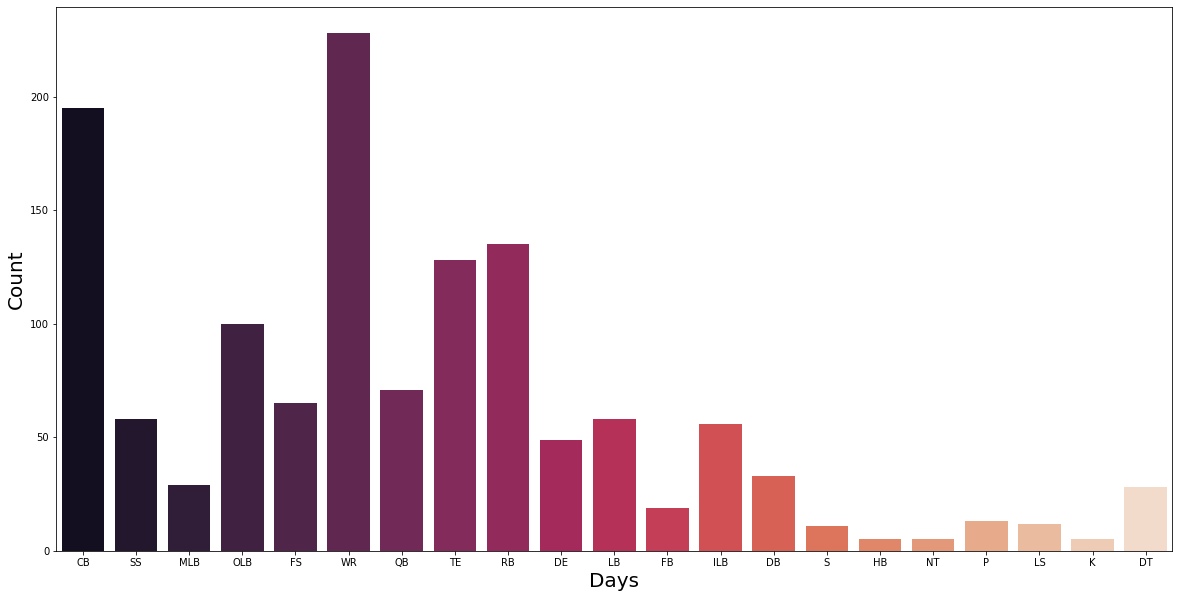

In [50]:
## Barchart representing number of games on the day
import seaborn as sns

plt.figure(figsize=(20,10))
graph = sns.countplot(x='position', data=players_data, palette='rocket')
plt.xlabel('Days',size=20)
plt.ylabel('Count',size=20)

Text(0, 0.5, 'Count')

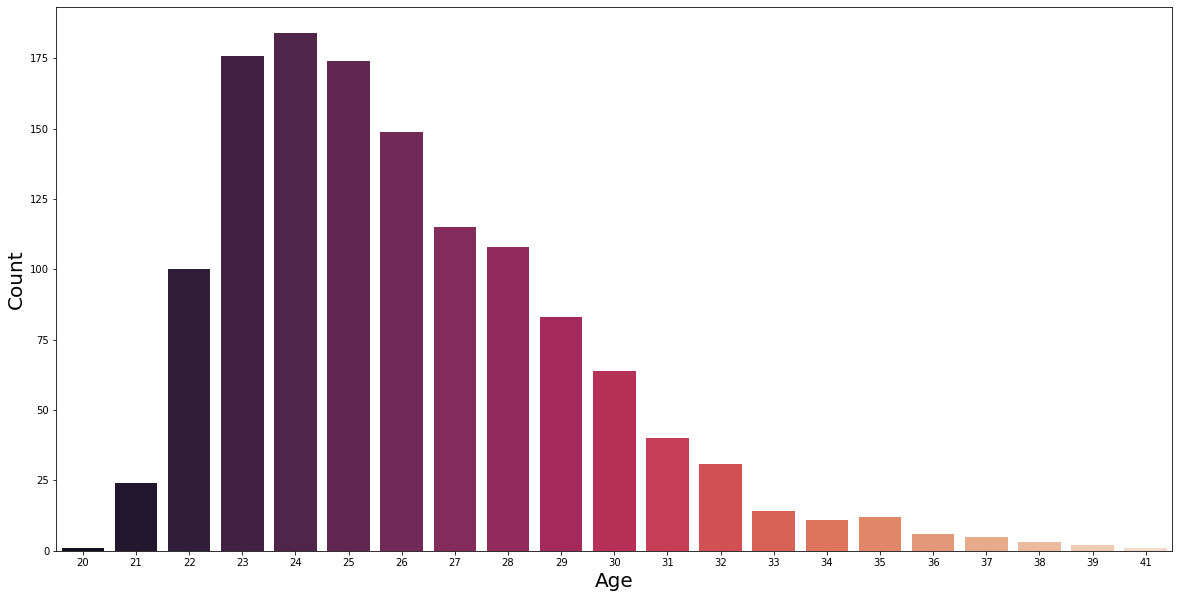

In [51]:
## Barcharts representing players age

plt.figure(figsize=(20,10))
graph = sns.countplot(x='age', data=players_data, palette='rocket')
plt.xlabel('Age',size=20)
plt.ylabel('Count',size=20)

In [52]:
#pip install plotly

In [53]:
import pandas as pd
import plotly.express as px

In [54]:
def animation(data):
    figure = px.scatter(
        data, 
        x='x', y='y', animation_frame='time', animation_group='position', color='team', text='position',
        range_x=[-10, 130], range_y=[-10,65],
        hover_data=['displayName', 'jerseyNumber'])
    figure.update_traces(textposition='top center', marker_size=10)
    figure.update_layout(paper_bgcolor='darkgreen', plot_bgcolor='darkgreen', font_color='white')
    return figure

In [55]:
week1 = pd.read_csv('week1.csv',low_memory = False)
times = week1.time.unique()

FileNotFoundError: [Errno 2] No such file or directory: 'week1.csv'

In [56]:
time_slice = times[0:1000:5] # Change here
week1_slice = week1[week1.time.isin(time_slice)]
figure = animation(week1_slice)
figure.show()

NameError: name 'times' is not defined

In [57]:
pip install cufflinks chart_studio

Note: you may need to restart the kernel to use updated packages.


In [58]:
import chart_studio
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [59]:
players_data['position'].iplot(kind='hist', xTitle='position',
                  yTitle='count', title='Position Distribution')

In [60]:
players_data.pivot(columns='position', values='weight').iplot(
        kind='box',
        yTitle='weight',
        title='Weight Distribution by Position')

## Training Data and Test Data Preparation

In [25]:
##Splitting inta Train and Test data
from sklearn.model_selection import train_test_split

X = plays_df.drop(columns=['passResult'],axis=1)
y = plays_df['passResult']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)

In [27]:
#import lazypredict

In [28]:
#from lazypredict.Supervised import LazyClassifier

#clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

In [29]:
#models,predictions = clf.fit(X_train,X_test,y_train,y_test)

In [30]:
#print(models)

In [31]:
from sklearn import preprocessing

In [32]:
#Label Encoding column (possessionTeam)
label_encoder1 = preprocessing.LabelEncoder()

plays_df['possessionTeam'] = label_encoder1.fit_transform(plays_df['possessionTeam'])


In [33]:
#Label Encoding column (playType)
label_encoder2 = preprocessing.LabelEncoder()

plays_df['playType'] = label_encoder1.fit_transform(plays_df['playType'])


In [34]:
#Label Encoding column (offenseFormation)
label_encoder3 = preprocessing.LabelEncoder()

plays_df['offenseFormation'] = label_encoder1.fit_transform(plays_df['offenseFormation'])

In [35]:
#Label Encoding column (typeDropback)
label_encoder4 = preprocessing.LabelEncoder()

plays_df['typeDropback'] = label_encoder1.fit_transform(plays_df['typeDropback'])

In [36]:
X1 = plays_df.drop(columns=['passResult'],axis=1)
y1 = plays_df['passResult']

In [37]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.40,random_state=42)

## Logistic Regression

#### Model Fitting

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred1=logreg.predict(X_test1)

In [42]:
CM_log = confusion_matrix(y_test1,y_pred1)

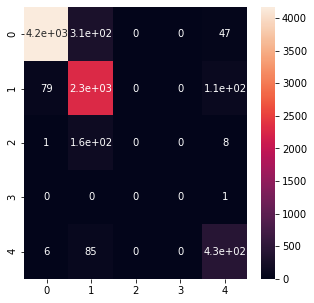

In [43]:
## Heatmap of confusion matrix (Logistic Regression)

plt.figure(figsize = (5,5))
ax = plt.axes()

sns.heatmap(CM_log, annot=True)
#ax.xaxis.set_ticks_position('top')
plt.show()

#### Confusion matrix and Classification report

In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))
print()
print("Classification Report")
print(classification_report(y_test1, y_pred1))

Confusion Matrix:
[[4167  309    0    0   47]
 [  79 2294    0    0  112]
 [   1  160    0    0    8]
 [   0    0    0    0    1]
 [   6   85    0    0  426]]

Classification Report
              precision    recall  f1-score   support

           C       0.98      0.92      0.95      4523
           I       0.81      0.92      0.86      2485
          IN       0.00      0.00      0.00       169
           R       0.00      0.00      0.00         1
           S       0.72      0.82      0.77       517

    accuracy                           0.89      7695
   macro avg       0.50      0.53      0.52      7695
weighted avg       0.88      0.89      0.89      7695



/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
log_accuracy = accuracy_score(y_test1,y_pred1)*100

log_accuracy.round(4)

89.4997

In [46]:
log_precision = precision_score(y_test1,y_pred1,pos_label='positive',average='weighted')*100

log_precision.round(4)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


88.4201

In [47]:
log_recall = recall_score(y_test1,y_pred1,pos_label='positive', average='weighted')*100

log_recall.round(4)

89.4997

In [48]:
log_F1 = f1_score(y_test1,y_pred1,pos_label='positive', average='weighted')*100

log_F1.round(4)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


88.7528

## Gradient Boosting Regressor (GBR)

#### Model Fitting

In [49]:
##X_train1,X_test1,y_train1,y_test1

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
model_GBR = GradientBoostingClassifier()
model_GBR.fit(X_train1,y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
predictions_GBR = model_GBR.predict(X_test1)

In [52]:
CM_GBR = confusion_matrix(y_test1, predictions_GBR)

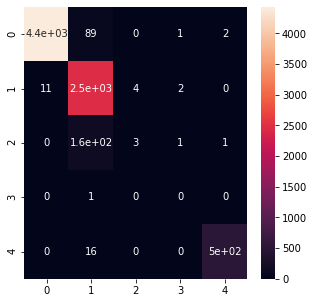

In [53]:
## Heatmap of confusion matrix (Gradient Boosting Regressor)

plt.figure(figsize = (5,5))
ax = plt.axes()

sns.heatmap(CM_GBR, annot=True)
#ax.xaxis.set_ticks_position('top')
plt.show()

#### Confusion matrix and Classification report

In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test1, predictions_GBR))
print()
print("Classification Report")
print(classification_report(y_test1, predictions_GBR))

Confusion Matrix:
[[4431   89    0    1    2]
 [  11 2468    4    2    0]
 [   0  164    3    1    1]
 [   0    1    0    0    0]
 [   0   16    0    0  501]]

Classification Report
              precision    recall  f1-score   support

           C       1.00      0.98      0.99      4523
           I       0.90      0.99      0.95      2485
          IN       0.43      0.02      0.03       169
           R       0.00      0.00      0.00         1
           S       0.99      0.97      0.98       517

    accuracy                           0.96      7695
   macro avg       0.66      0.59      0.59      7695
weighted avg       0.95      0.96      0.95      7695



In [55]:
GBR_accuracy = accuracy_score(y_test1, predictions_GBR)*100

GBR_accuracy.round(4)

96.2053

In [56]:
GBR_precision = precision_score(y_test1, predictions_GBR,pos_label='positive', average='weighted')*100

GBR_precision.round(4)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


95.3619

In [57]:
GBR_recall = recall_score(y_test1,predictions_GBR,pos_label='positive', average='weighted')*100

GBR_recall.round(4)

96.2053

In [58]:
GBR_F1 = f1_score(y_test1,predictions_GBR,pos_label='positive', average='weighted')*100

GBR_F1.round(4)

95.2908

## Random Forest

#### Model Fitting

In [59]:
##X_train1,X_test1,y_train1,y_test1

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
predict_RF = model_RF.predict(X_test1)

In [61]:
CM_RF = confusion_matrix(y_test,predict_RF)

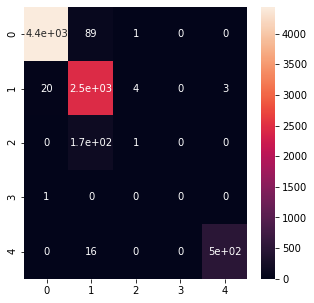

In [62]:
## Heatmap of confusion matrix (Random Forest)

plt.figure(figsize = (5,5))
ax = plt.axes()

sns.heatmap(CM_RF, annot=True)
#ax.xaxis.set_ticks_position('top')
plt.show()

#### Confusion Matrix and Classification Report

In [63]:
print("Confusion Matrix:")
print(confusion_matrix(y_test1, predict_RF))
print()
print("Classification Report")
print(classification_report(y_test1, predict_RF))

Confusion Matrix:
[[4433   89    1    0    0]
 [  20 2458    4    0    3]
 [   0  168    1    0    0]
 [   1    0    0    0    0]
 [   0   16    0    0  501]]

Classification Report
              precision    recall  f1-score   support

           C       1.00      0.98      0.99      4523
           I       0.90      0.99      0.94      2485
          IN       0.17      0.01      0.01       169
           R       0.00      0.00      0.00         1
           S       0.99      0.97      0.98       517

    accuracy                           0.96      7695
   macro avg       0.61      0.59      0.58      7695
weighted avg       0.95      0.96      0.95      7695



/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
RF_accuracy = accuracy_score(y_test1,predict_RF)*100

RF_accuracy.round(4)

96.0754

In [65]:
RF_precision = precision_score(y_test1,predict_RF,pos_label='positive',average='weighted')*100

RF_precision.round(4)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


94.6115

In [66]:
RF_recall = recall_score(y_test1,predict_RF,pos_label='positive',average='weighted')*100

RF_recall.round(4)

96.0754

In [67]:
RF_F1 = f1_score(y_test1,predict_RF,pos_label='positive',average='weighted')*100

RF_F1.round(4)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


95.1067

## Bagging

#### Model Fitting

In [68]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
seed = 8
num_trees = 500

model_bagging = BaggingClassifier(base_estimator = classifier, n_estimators = num_trees,random_state = seed)
model_bagging.fit(X_train1,y_train1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [69]:
predict_bagging = model_bagging.predict(X_test1)

In [70]:
CM_Bagging = confusion_matrix(y_test1,predict_bagging)

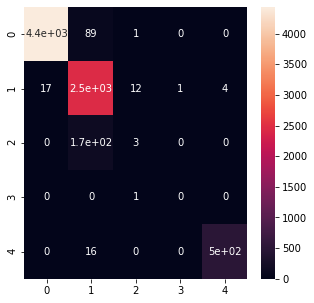

In [71]:
## Heatmap of confusion matrix (Bagging)

plt.figure(figsize = (5,5))
ax = plt.axes()

sns.heatmap(CM_Bagging, annot=True)
#ax.xaxis.set_ticks_position('top')
plt.show()

#### Confusion matrix and Classification report

In [72]:
print("Confusion Matrix:")
print(confusion_matrix(y_test1, predict_bagging))
print()
print("Classification Report")
print(classification_report(y_test1, predict_bagging))

Confusion Matrix:
[[4433   89    1    0    0]
 [  17 2451   12    1    4]
 [   0  166    3    0    0]
 [   0    0    1    0    0]
 [   0   16    0    0  501]]

Classification Report
              precision    recall  f1-score   support

           C       1.00      0.98      0.99      4523
           I       0.90      0.99      0.94      2485
          IN       0.18      0.02      0.03       169
           R       0.00      0.00      0.00         1
           S       0.99      0.97      0.98       517

    accuracy                           0.96      7695
   macro avg       0.61      0.59      0.59      7695
weighted avg       0.95      0.96      0.95      7695



In [73]:
Bagging_accuracy = accuracy_score(y_test1,predict_bagging)*100

Bagging_accuracy.round(4)

96.0104

In [74]:
Bagging_precision = precision_score(y_test1,predict_bagging,pos_label='positive',average='weighted')*100

Bagging_precision.round(4)

/Users/rkp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


94.6854

In [75]:
Bagging_recall = recall_score(y_test1,predict_bagging,pos_label='positive',average='weighted')*100

Bagging_recall.round(4)

96.0104

In [76]:
Bagging_F1 = f1_score(y_test1,predict_bagging,pos_label='positive',average='weighted')*100

Bagging_F1.round(4)

95.1376

## Comparing models using charts

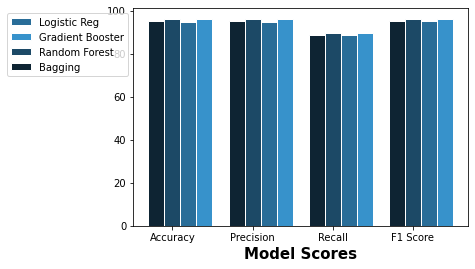

In [77]:
# # set width of bar
barWidth = 0.20
 
# # set height of bar
Accuracy_bar = [Bagging_accuracy, RF_accuracy, log_accuracy, GBR_accuracy]
Precision_Bar = [Bagging_precision, RF_precision ,log_precision ,GBR_precision ]
Recall_bar =[Bagging_recall, RF_recall , log_recall, GBR_recall]
F1_bar = [Bagging_F1, RF_F1, log_F1, GBR_F1]
 
# # Set position of bar on X axis
r1 = np.arange(len(Accuracy_bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# # Make the plot
plt.bar(r3, Precision_Bar, color='#296d98', width=barWidth, edgecolor='white', label='Logistic Reg')
plt.bar(r4, Recall_bar, color='#3792cb', width=barWidth, edgecolor='white', label='Gradient Booster')
plt.bar(r2, Accuracy_bar, color='#1c4966', width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r1, F1_bar, color='#0e2433', width=barWidth, edgecolor='white', label='Bagging')


# # Add xticks on the middle of the group bars
plt.xlabel('Model Scores',size= 15, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(F1_bar))], ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
 
# # Create legend & Show graphic
plt.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)

plt.rcParams['figure.figsize']= [13,8]

